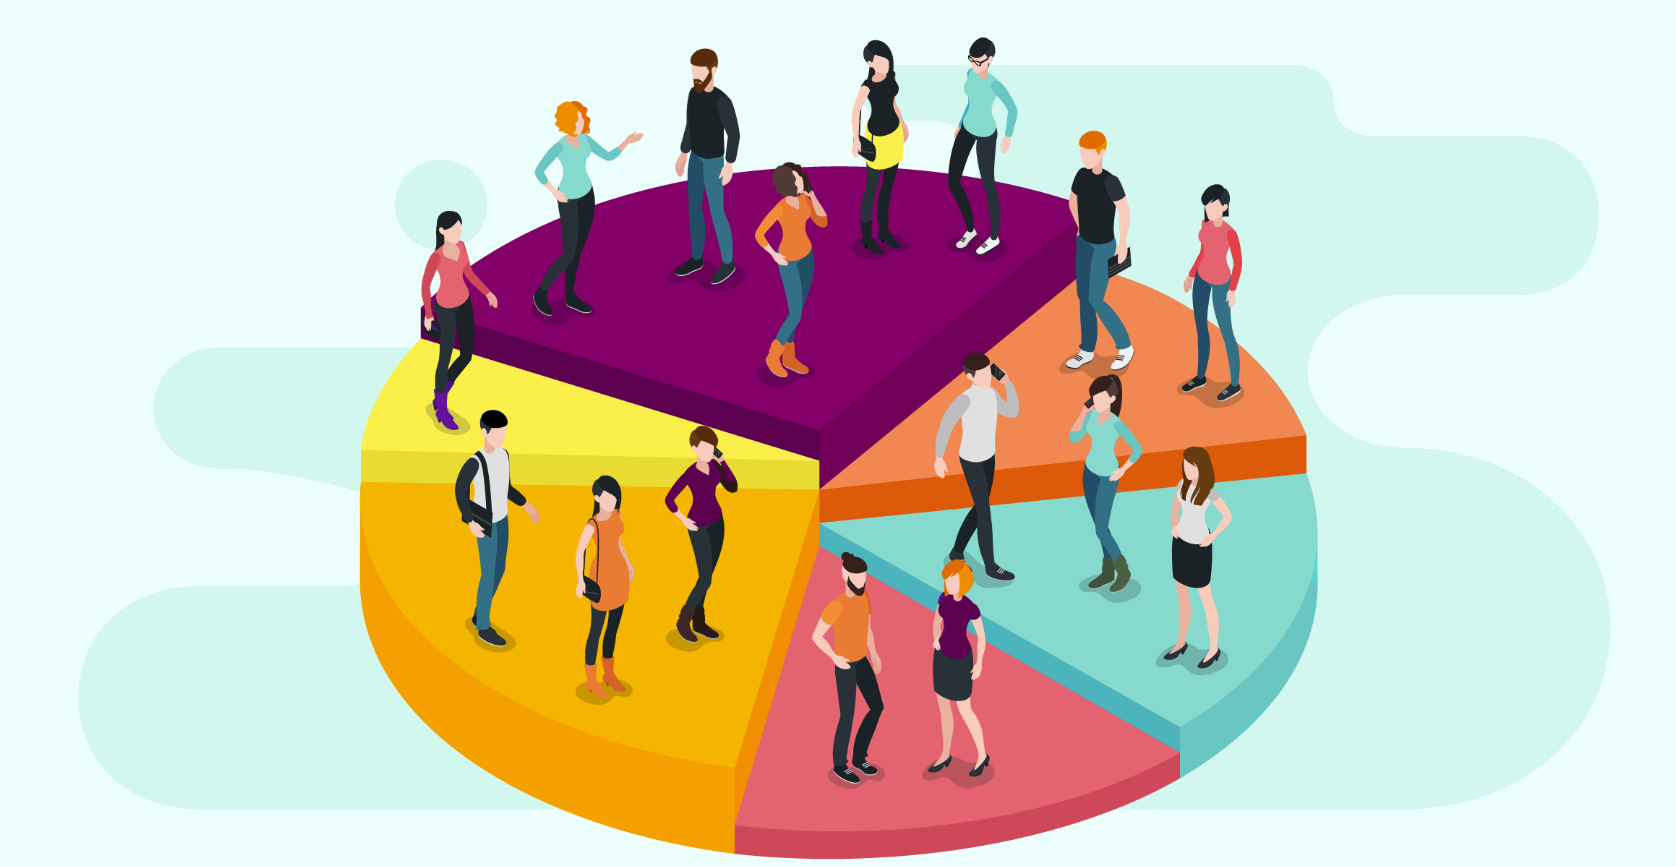

## About Dataset
<br>
This dataset provides comprehensive customer data suitable for segmentation analysis. It includes anonymized demographic, transactional, and behavioral attributes, allowing for detailed exploration of customer segments. Leveraging this dataset, marketers, data scientists, and business analysts can uncover valuable insights to optimize targeted marketing strategies and enhance customer engagement. Whether you're looking to understand customer behavior or improve campaign effectiveness, this dataset offers a rich resource for actionable insights and informed decision-making.

#### Key Features:
* Anonymized demographic, transactional, and behavioral data.
* Suitable for customer segmentation analysis.
* Opportunities to optimize targeted marketing strategies.
* Valuable insights for improving campaign effectiveness.
* Ideal for marketers, data scientists, and business analysts.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-data/customer_segmentation_data.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [5]:
df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


## Let's create distributions for each feature.

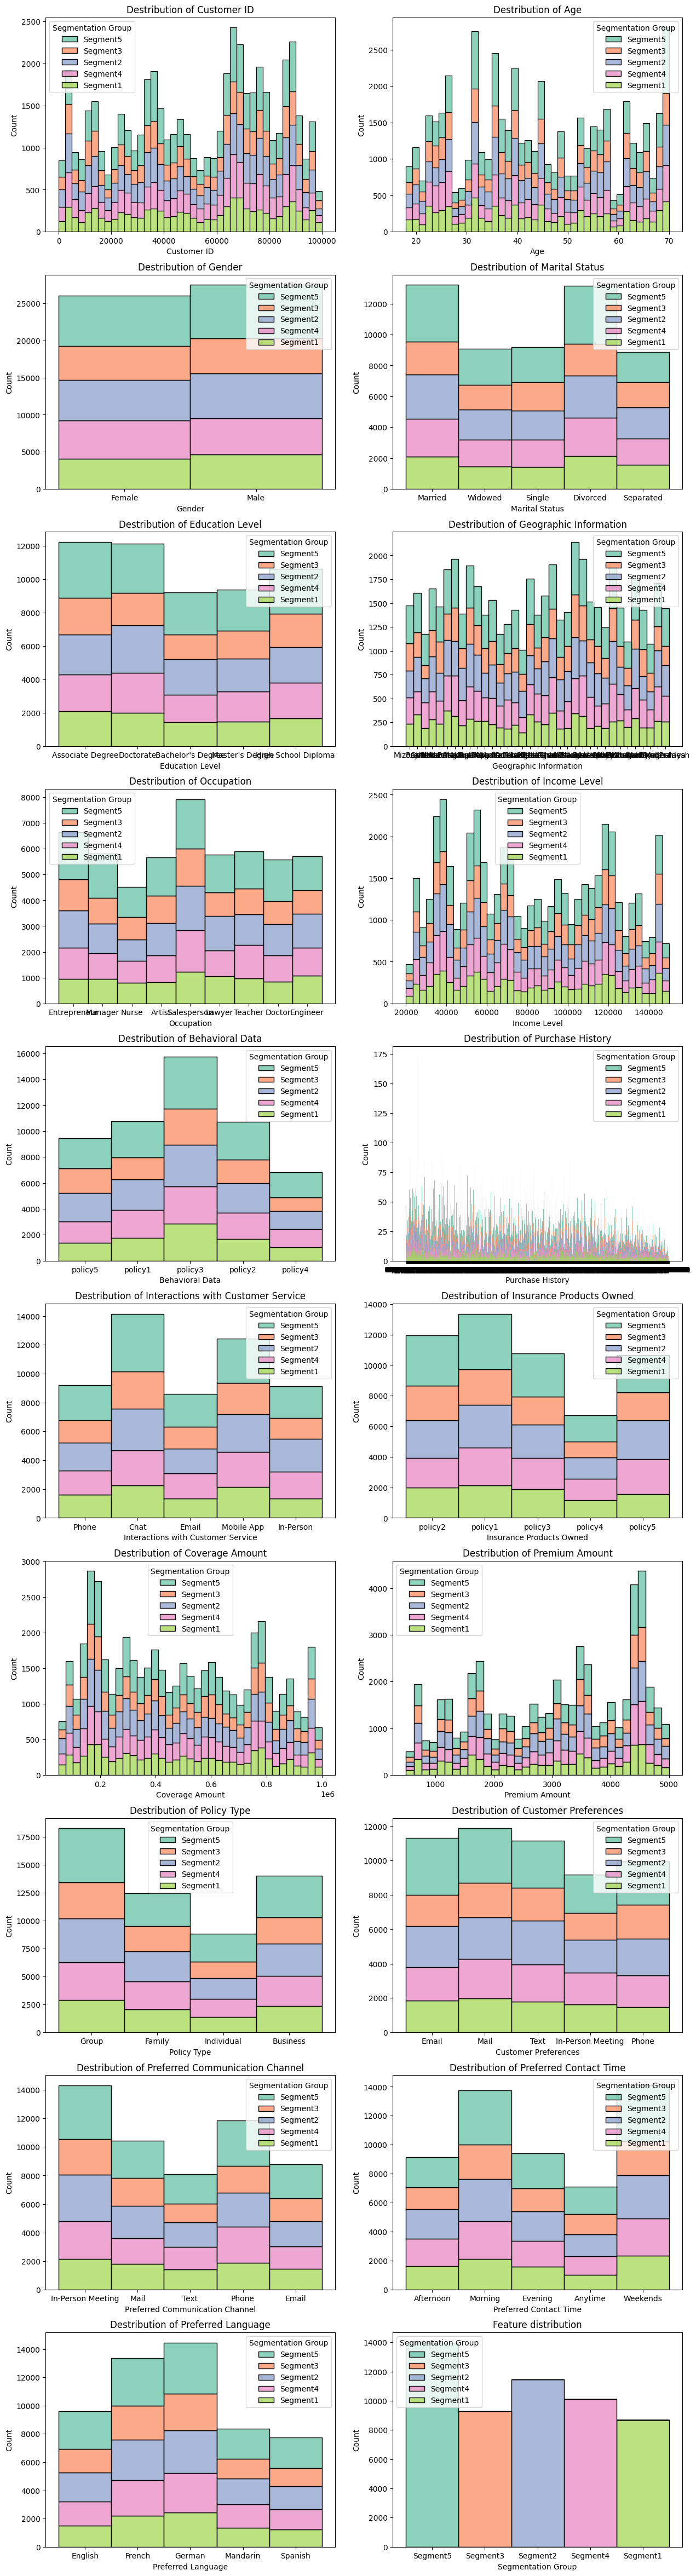

In [6]:
data_columns = df.columns
nrows = len(data_columns) // 2 + len(data_columns) % 2 # Counting the number of rows in a table with two columns.

fig, axes = plt.subplots(nrows=nrows, ncols= 2, figsize = (15, 60))
for i, columns in enumerate(data_columns):
    sns.histplot(data = df, x = columns, ax = axes[i // 2, i % 2], hue='Segmentation Group', palette="Set2",  multiple="stack")
    axes[i // 2, i % 2].set_title(f'Destribution of {columns}')
plt.title('Feature distribution')
plt.tight_layout
plt.show()

### The distribution of the "Segmentation Group" on each histogram plot looks very similar, with "Segment5" being the largest and "Segment1" being the smallest in each case. It's a little confusing.

<Axes: >

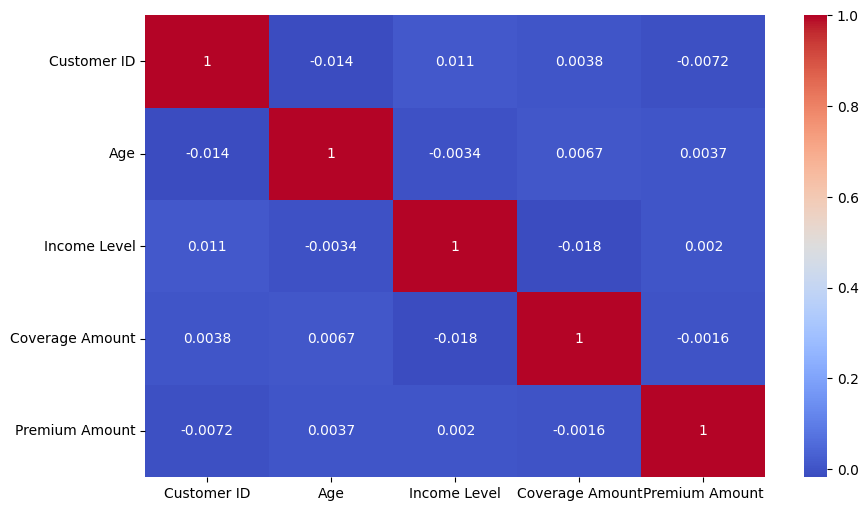

In [7]:
# Creating the heatmap for numerical data.
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only= True), annot = True, cmap='coolwarm')

### And again, we don't observe any correlation.

## Check the types of values and their unique instances for each feature.

In [8]:
df.nunique()

Customer ID                           40259
Age                                      53
Gender                                    2
Marital Status                            5
Education Level                           5
Geographic Information                   35
Occupation                                9
Income Level                          42779
Behavioral Data                           5
Purchase History                       2016
Interactions with Customer Service        5
Insurance Products Owned                  5
Coverage Amount                       51765
Premium Amount                         4460
Policy Type                               4
Customer Preferences                      5
Preferred Communication Channel           5
Preferred Contact Time                    5
Preferred Language                        5
Segmentation Group                        5
dtype: int64

In [9]:
df.dtypes

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object

In [10]:
unique_val = pd.DataFrame({'Unique values': df.nunique(), 'DType': df.dtypes})
unique_val

,Unique values,DType
Customer ID,40259,int64
Age,53,int64
Gender,2,object
Marital Status,5,object
Education Level,5,object
Geographic Information,35,object
Occupation,9,object
Income Level,42779,int64
Behavioral Data,5,object
Purchase History,2016,object


In [11]:
df['Geographic Information'].unique()

array(['Mizoram', 'Goa', 'Rajasthan', 'Sikkim', 'West Bengal',
       'Uttar Pradesh', 'Himachal Pradesh', 'Manipur', 'Gujarat',
       'Andaman and Nicobar Islands', 'Tripura', 'Nagaland', 'Karnataka',
       'Odisha', 'Maharashtra', 'Telangana', 'Delhi', 'Chandigarh',
       'Jharkhand', 'Arunachal Pradesh', 'Tamil Nadu',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Bihar', 'Daman and Diu',
       'Assam', 'Punjab', 'Haryana', 'Chhattisgarh', 'Puducherry',
       'Uttarakhand', 'Andhra Pradesh', 'Kerala', 'Madhya Pradesh',
       'Meghalaya'], dtype=object)

### There are numerous unique locations to convert them into dummy variables.

In [12]:
df['Occupation'].unique()

array(['Entrepreneur', 'Manager', 'Nurse', 'Artist', 'Salesperson',
       'Lawyer', 'Teacher', 'Doctor', 'Engineer'], dtype=object)

### Dropping the ID table, geographic, and time information as they seem unnecessary.

In [13]:
df.drop(['Customer ID', 'Geographic Information', 'Purchase History'], axis = 1, inplace = True)
df.head()

,Age,Gender,Marital Status,Education Level,Occupation,Income Level,Behavioral Data,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,23,Female,Married,Associate Degree,Entrepreneur,70541,policy5,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,26,Male,Widowed,Doctorate,Manager,54168,policy5,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,29,Female,Single,Associate Degree,Entrepreneur,73899,policy5,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,20,Male,Divorced,Bachelor's Degree,Entrepreneur,63381,policy5,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,25,Female,Separated,Bachelor's Degree,Manager,38794,policy1,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


### Apply one-hot encoding for non-numeric columns.

In [14]:
# Check columns
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level', 'Occupation',
       'Income Level', 'Behavioral Data', 'Interactions with Customer Service',
       'Insurance Products Owned', 'Coverage Amount', 'Premium Amount',
       'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [15]:
#Select columns
dumm_col = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
       'Behavioral Data', 'Interactions with Customer Service',
       'Insurance Products Owned', 'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language']

In [16]:
df_dumm = pd.get_dummies(df, columns = dumm_col, dtype = int) 
df_dumm

,Age,Income Level,Coverage Amount,Premium Amount,Segmentation Group,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,...,Preferred Contact Time_Afternoon,Preferred Contact Time_Anytime,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Preferred Contact Time_Weekends,Preferred Language_English,Preferred Language_French,Preferred Language_German,Preferred Language_Mandarin,Preferred Language_Spanish
0,23,70541,366603,2749,Segment5,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,26,54168,780236,1966,Segment5,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,29,73899,773926,4413,Segment3,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,20,63381,787815,4342,Segment3,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,25,38794,366506,1276,Segment2,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,35,120850,586401,4404,Segment5,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
53499,61,122309,637733,1285,Segment1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
53500,25,49258,631057,4407,Segment4,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
53501,42,66301,730385,4482,Segment5,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


### Create X and y datasets

In [17]:
X = df_dumm.drop('Segmentation Group', axis = 1)
y = df_dumm['Segmentation Group']

### Split the data into training set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

### Apply scaling to optimize calculations

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Import metrics for logistic regression

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression model (scikit-learn)

In [21]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [22]:
class_rep_lr = classification_report(y_test, y_pred_lr)
print(class_rep_lr)

              precision    recall  f1-score   support

    Segment1       0.25      0.05      0.08      1708
    Segment2       0.27      0.24      0.25      2328
    Segment3       0.21      0.07      0.10      1881
    Segment4       0.25      0.12      0.16      2042
    Segment5       0.28      0.69      0.40      2742

    accuracy                           0.27     10701
   macro avg       0.25      0.23      0.20     10701
weighted avg       0.25      0.27      0.22     10701



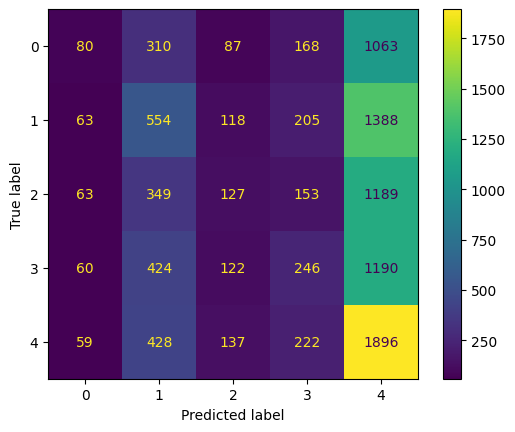

In [23]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_disp_lr = ConfusionMatrixDisplay(cm_lr).plot()

### The result is quite confusing. The Logistic Regression model provides only 27% accuracy.

# Random forest model (scikit-learn)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=99)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [25]:
class_rep_rf = classification_report(y_test, y_pred_rf)
print(class_rep_rf)

              precision    recall  f1-score   support

    Segment1       0.17      0.06      0.09      1708
    Segment2       0.23      0.25      0.24      2328
    Segment3       0.20      0.08      0.12      1881
    Segment4       0.22      0.14      0.17      2042
    Segment5       0.27      0.56      0.37      2742

    accuracy                           0.25     10701
   macro avg       0.22      0.22      0.20     10701
weighted avg       0.23      0.25      0.21     10701



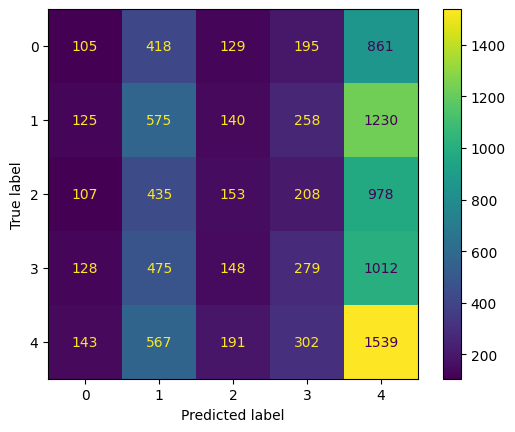

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_disp_rf = ConfusionMatrixDisplay(cm_rf).plot()

### Random Forest model provides 25% accuracy

# Neural Netvork (TensorFlow)

### Convert y_train to integers and then categorize them for the neural network's requirements.

In [27]:
from keras.utils import to_categorical

2024-05-07 15:03:37.409195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 15:03:37.409321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 15:03:37.543952: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
map_nn = {'Segment1': 0, 'Segment2': 1, 'Segment3': 2, 'Segment4': 3, 'Segment5': 4}
y_train_int = y_train.map(map_nn)
y_test_int = y_test.map(map_nn)

y_train_nn = to_categorical(y_train_int, 5)
y_test_nn = to_categorical(y_test_int, 5)
# check new y_train
y_train_nn

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
# We need to determine the input shape for the first layer of the neural network.
X_train.shape

(42802, 64)

### Create the NN model

In [31]:
model_nn = Sequential()

model_nn.add(Dense(64, activation = 'relu', input_shape = (64,)))
model_nn.add(Dense(128, activation = 'relu'))
model_nn.add(Dense(256, activation = 'relu'))
model_nn.add(Dense(256, activation = 'relu'))
model_nn.add(Dense(128, activation = 'relu'))
model_nn.add(Dense(64, activation = 'relu'))
model_nn.add(Dense(5, activation = 'softmax'))

model_nn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

### Train the NN model

In [33]:
model_nn.fit(x = X_train, y = y_train_nn, epochs = 50, validation_data = (X_test, y_test_nn), callbacks = [early_stop])

Epoch 1/50
  81/1338 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2489 - loss: 1.6056

I0000 00:00:1715094232.118872      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1338/1338 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2618 - loss: 1.5951 - val_accuracy: 0.2648 - val_loss: 1.5896
Epoch 2/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2748 - loss: 1.5835 - val_accuracy: 0.2603 - val_loss: 1.5997
Epoch 3/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2773 - loss: 1.5770 - val_accuracy: 0.2643 - val_loss: 1.5864
Epoch 4/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2855 - loss: 1.5689 - val_accuracy: 0.2568 - val_loss: 1.5942
Epoch 5/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2962 - loss: 1.5572 - val_accuracy: 0.2603 - val_loss: 1.5952
Epoch 6/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3080 - loss: 1.5412 - val_accuracy: 0.2570 - val_loss: 1.6017
Epoch 7/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3190 - loss: 1.5279 - val_accuracy: 0.2561 - val_loss: 1.6164
Epoch 8/50
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3294 - loss: 1.5063 - val_accurac

In [34]:
losses = pd.DataFrame(model_nn.history.history)
losses.tail()

,accuracy,loss,val_accuracy,val_loss
3,0.285851,1.569354,0.256798,1.594171
4,0.292790,1.560265,0.260350,1.595185
5,0.302135,1.548062,0.256985,1.601726
6,0.313817,1.533946,0.256144,1.616401
7,0.327975,1.512526,0.241847,1.640499


### Plot accuracy and loss graphics.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

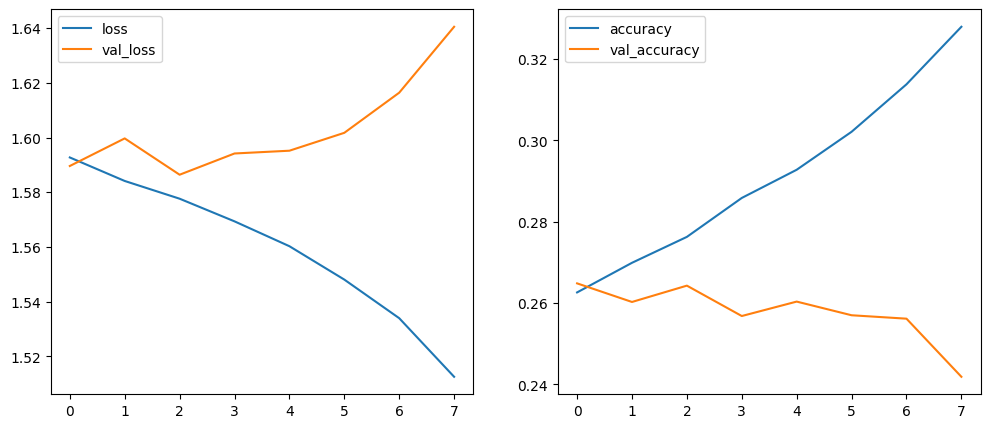

In [35]:
fig, axs = plt.subplots(1,2, figsize = (12,5))
losses[['loss', 'val_loss']].plot(ax = axs[0])
losses[['accuracy', 'val_accuracy']].plot(ax = axs[1])
plt.tight_layout

In [36]:
y_pred_nn = np.argmax(model_nn.predict(X_test), axis=-1)

335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
class_rep_nn = classification_report(y_test_int,y_pred_nn)
print(class_rep_nn)

              precision    recall  f1-score   support

           0       0.18      0.15      0.16      1708
           1       0.24      0.28      0.26      2328
           2       0.19      0.13      0.16      1881
           3       0.25      0.12      0.16      2042
           4       0.28      0.43      0.34      2742

    accuracy                           0.24     10701
   macro avg       0.23      0.22      0.22     10701
weighted avg       0.23      0.24      0.23     10701



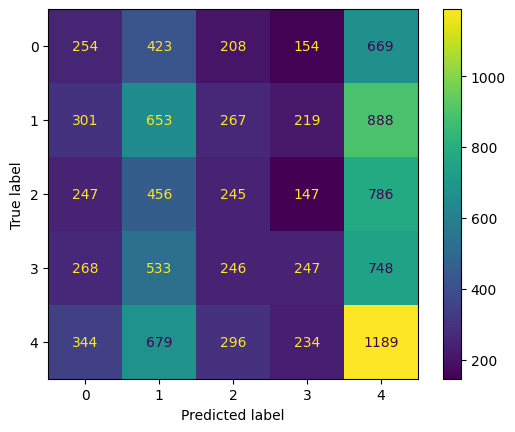

In [38]:
cm_nn = confusion_matrix(y_test_int, y_pred_nn)
cm_disp_nn = ConfusionMatrixDisplay(cm_nn).plot()

### The Neural Network model provides 25% accuracy

# Conclusions:

## * None of the models we examined could reach a satisfactory level of accuracy in their estimates. 
## * The data correlations indicate that this dataset is poorly suited for machine learning applications.
## * At first glance, the "customer-segmentation-data" dataset seems to be artificially generated, with data divided into five unequal segments.